## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [87]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [88]:
x_train.shape[0]

60000

In [89]:
x_test.shape[0]

10000

### Find dimensions of an image in the dataset

(28, 28)


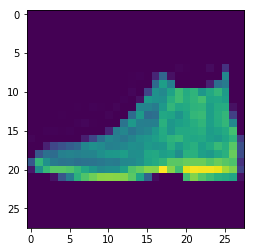

In [90]:
plt.imshow(x_test[0,:])
import matplotlib.pyplot as plt
print(x_train.shape[1:3])

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [91]:
import numpy as np
print(np.unique(y_train),np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4 5 6 7 8 9]


In [92]:
import keras
y_train_ohe=keras.utils.to_categorical(y_train)
y_test_ohe=keras.utils.to_categorical(y_test)

In [93]:
y_train_ohe.shape

(60000, 10)

In [94]:
print(y_train[0],y_train_ohe[0])

9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### Normalize both the train and test image data from 0-255 to 0-1

In [95]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_train /= 255

In [96]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [97]:
#Done in step above

### Import the necessary layers from keras to build the model

In [98]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D, Convolution3D, MaxPooling3D

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [99]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

# Define model
model2 = Sequential()

# 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

# Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

# Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model2
model2.fit(x_train, y_train_ohe, batch_size=BATCH_SIZE, nb_epoch=EPOCHS,validation_data=(x_test, y_test_ohe), 
           callbacks=callback_list)

C:\Users\sinamy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
C:\Users\sinamy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  del sys.path[0]
C:\Users\sinamy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.3717 - acc: 0.8669 - val_loss: 0.2878 - val_acc: 0.8929
Epoch 2/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.2309 - acc: 0.9151 - val_loss: 0.2760 - val_acc: 0.8996A: 2s - loss: 0.2315  - ETA: 0s - loss: 0.2310 - ac
Epoch 3/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.1655 - acc: 0.9377 - val_loss: 0.2497 - val_acc: 0.9138
Epoch 4/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.1150 - acc: 0.9567 - val_loss: 0.2656 - val_acc: 0.9134
Epoch 5/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0765 - acc: 0.9721 - val_loss: 0.3119 - val_acc: 0.9122
Epoch 6/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0542 - acc: 0.9800 - val_loss: 0.3646 - val_acc: 0.9094
Epoch 7/10
60000/60000 [==============================] - 104s 2ms/step - lo

In [100]:
loss_and_metrics = model2.evaluate(x_test, y_test_ohe)
print(loss_and_metrics)

10000/10000 [==============================] - 4s 365us/step
[0.4747920924376696, 0.9095]


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [101]:
BATCH_SIZE = 32
EPOCHS = 10

# Define model
model3 = Sequential()

# 1st Conv Layer
model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model3.add(Activation('relu'))

# 2nd Conv Layer
model3.add(Convolution2D(32, 3, 3))
model3.add(Activation('relu'))

# Max Pooling
model3.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model3.add(Dropout(0.25))
    
# Fully Connected Layer
model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation('relu'))

# Prediction Layer
model3.add(Dense(10))
model3.add(Activation('softmax'))

# Loss and Optimizer
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model2
model3.fit(x_train, y_train_ohe, batch_size=BATCH_SIZE, nb_epoch=EPOCHS,validation_data=(x_test, y_test_ohe), 
           callbacks=callback_list)

C:\Users\sinamy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  
C:\Users\sinamy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if sys.path[0] == '':
C:\Users\sinamy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.3958 - acc: 0.8573 - val_loss: 0.2917 - val_acc: 0.8934
Epoch 2/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.2590 - acc: 0.9042 - val_loss: 0.2478 - val_acc: 0.9110
Epoch 3/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.2119 - acc: 0.9218 - val_loss: 0.2372 - val_acc: 0.9145
Epoch 4/10
60000/60000 [==============================] - 118s 2ms/step - loss: 0.1781 - acc: 0.9328 - val_loss: 0.2277 - val_acc: 0.9177
Epoch 5/10
60000/60000 [==============================] - 118s 2ms/step - loss: 0.1499 - acc: 0.9440 - val_loss: 0.2314 - val_acc: 0.9195
Epoch 6/10
60000/60000 [==============================] - 118s 2ms/step - loss: 0.1287 - acc: 0.9511 - val_loss: 0.2392 - val_acc: 0.9232
Epoch 7/10
60000/60000 [==============================] - 117s 2ms/step - loss: 0.1087 - acc: 0.9593 - val_loss: 0.2482 - 

In [102]:
loss_and_metrics = model3.evaluate(x_test, y_test_ohe)
print(loss_and_metrics)

10000/10000 [==============================] - 5s 518us/step
[0.2835789676308632, 0.923]


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [103]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

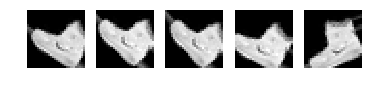

In [104]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [106]:
datagen.fit(x_train)
model3.fit_generator(datagen.flow(x_train, y_train_ohe, batch_size=BATCH_SIZE),
                         validation_data=(x_test, y_test_ohe),
                         steps_per_epoch=len(x_train) // BATCH_SIZE,
                         epochs=10)

Epoch 1/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.3635 - acc: 0.8669 - val_loss: 0.3093 - val_acc: 0.8892
Epoch 2/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.3575 - acc: 0.8678 - val_loss: 0.2934 - val_acc: 0.8953los - ETA: 1s - los
Epoch 3/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.3546 - acc: 0.8692 - val_loss: 0.2899 - val_acc: 0.9005
Epoch 4/10
1875/1875 [==============================] - 118s 63ms/step - loss: 0.3499 - acc: 0.8715 - val_loss: 0.2919 - val_acc: 0.9003
Epoch 5/10
1875/1875 [==============================] - 118s 63ms/step - loss: 0.3435 - acc: 0.8736 - val_loss: 0.3047 - val_acc: 0.8932
Epoch 6/10
1875/1875 [==============================] - 119s 63ms/step - loss: 0.3407 - acc: 0.8746 - val_loss: 0.2972 - val_acc: 0.8931loss: 0.3407 - acc: 0 - ETA: 1s 
Epoch 7/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.3403 - acc: 0.8767 - val_loss: 0.3020 - val_ac

In [107]:
loss_and_metrics = model3.evaluate(x_test, y_test_ohe)
print(loss_and_metrics)

10000/10000 [==============================] - 5s 534us/step
[0.2902770728468895, 0.9001]


###  Report the final train and validation accuracy

In [0]:
#CNN1 : Train : 0.9877 Test : 0.9095 with 10 Epochs
#CNN2 : Train : 0.9717 Test : 0.9230 with 10 Epochs
#CNN3 : Train : 0.8788 Test : 0.9001 with 10 Epochs

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [55]:
from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [57]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 1812s 11us/step


In [62]:
print(x_train.shape[0],y_train.shape[0])
print(x_test.shape[0],y_train.shape[0])

50000 50000
10000 50000


In [66]:
print(x_train.shape[1:])
print(np.unique(y_train),np.unique(y_test))
y_train_ohe=keras.utils.to_categorical(y_train)
y_test_ohe=keras.utils.to_categorical(y_test)

(32, 32, 3)
[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4 5 6 7 8 9]


In [67]:
x_train_normal = x_train / 255
x_test_normal = x_test / 255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [68]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

### **Prepare/fit the generator.**

In [83]:
# Define model
model = Sequential()
model.add(Convolution2D(32, (3, 3), padding='same', input_shape=x_train_normal.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model4
datagen.fit(x_train_normal)
model.fit_generator(datagen.flow(x_train_normal, y_train_ohe, batch_size=BATCH_SIZE),
                         validation_data=(x_test_normal, y_test_ohe),
                         steps_per_epoch=len(x_train) // BATCH_SIZE,
                         epochs=10,workers=4)

Epoch 1/10
1562/1562 [==============================] - 142s 91ms/step - loss: 1.8401 - acc: 0.3131 - val_loss: 1.5202 - val_acc: 0.4431
Epoch 2/10
1562/1562 [==============================] - 144s 93ms/step - loss: 1.6058 - acc: 0.4121 - val_loss: 1.4353 - val_acc: 0.4679
Epoch 3/10
1562/1562 [==============================] - 144s 92ms/step - loss: 1.5041 - acc: 0.4523 - val_loss: 1.3198 - val_acc: 0.5266
Epoch 4/10
1562/1562 [==============================] - 142s 91ms/step - loss: 1.4415 - acc: 0.4771 - val_loss: 1.3490 - val_acc: 0.5217
Epoch 5/10
1562/1562 [==============================] - 145s 93ms/step - loss: 1.4026 - acc: 0.4926 - val_loss: 1.1939 - val_acc: 0.5775
Epoch 6/10
1562/1562 [==============================] - 144s 92ms/step - loss: 1.3680 - acc: 0.5088 - val_loss: 1.2714 - val_acc: 0.5480
Epoch 7/10
1562/1562 [==============================] - 144s 92ms/step - loss: 1.3405 - acc: 0.5174 - val_loss: 1.1898 - val_acc: 0.5785
Epoch 8/10
1562/1562 [===================

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

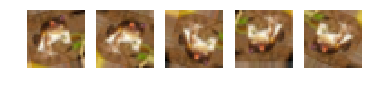

In [86]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_normal[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()